### PART B
#### DOMAIN: Automobile
#### CONTEXT :
- The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
#### DATA DESCRIPTION:
- The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were 
  used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular 
  combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily 
  distinguishable, but it would be more difficult to distinguish between the cars.
- All the features are numeric i.e. geometric features extracted from the silhouette.
#### PROJECT OBJECTIVE:
- Apply dimensionality reduction technique – PCA and train a model and compare relative results

In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

import warnings
warnings.simplefilter('ignore')

### Q1: Data Understanding & Cleaning
#### Q1A: Read ‘vehicle.csv’ and save as DataFrame.

In [167]:
df = pd.read_csv('vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [168]:
df.shape

(846, 19)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

#### Q1B: Check percentage of missing values and impute with correct approach.

In [173]:
#Print the % of missing values.
print((df.isna().sum()/len(df))*100)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [32]:
#Missing values count
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [33]:
# 'circularity' feature has 5 missing values. Lets print all rows for which circularity columns has missing values.
print(df[df['circularity'].isnull()])

     compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
266           86          NaN                  65.0         116.0   
396          108          NaN                 106.0         177.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
266                  53.0                        6          152.0   
396                  51.0                        5          256.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5             26.0                    28.0                        169   
105           30.0      

    Circularity column has 5 NaN values. Lets impute them with median value since its mean and median are almost same.

In [34]:
median = df['circularity'].median()
df['circularity'].fillna(value=median, inplace=True)

    distance_circularity column has 4 NaN values. Lets impute them with median value since its mean and median are almost same.

In [36]:
median = df['distance_circularity'].median()
df['distance_circularity'].fillna(value=median, inplace=True)

    radius_ratio has 6 NaN values. Lets impute them with median value since its mean and median are almost same.

In [38]:
median = df['radius_ratio'].median()
df['radius_ratio'].fillna(value=median, inplace=True)

    scaled_radius_of_gyration.1 has 4 NaN values. Lets impute them with median value since its mean and median are almost same.

In [39]:
median = df['scaled_radius_of_gyration.1'].median()
df['scaled_radius_of_gyration.1'].fillna(value=median, inplace=True)

    skewness_about has 6 NaN values. Lets impute them with median value since its mean and median are almost same.

In [40]:
median = df['skewness_about'].median()
df['skewness_about'].fillna(value=median, inplace=True)

    Below features also have NaN values but these are less in number and we can drop them.
    pr.axis_aspect_ratio           2
    scatter_ratio                  1
    elongatedness                  1
    pr.axis_rectangularity         3
    scaled_variance                3
    scaled_variance.1              2
    scaled_radius_of_gyration      2
    skewness_about.1               1
    skewness_about.2               1

In [41]:
#Remove all the rows with NaN values(for above features)        
df = df.dropna()

In [42]:
#Missing values count
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

    As can be seen above, there are no missing values any more after the treatment.

#### Q1C: Visualize a Pie-chart and print percentage of values for variable ‘class’

<Axes: title={'center': 'Vehicle Class'}, ylabel='class'>

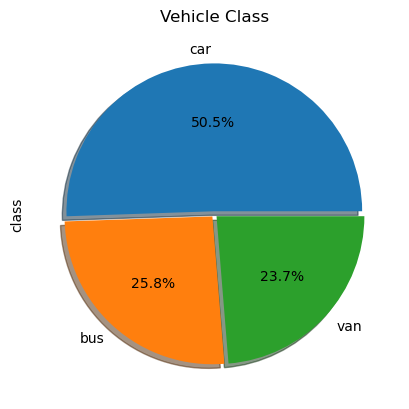

In [64]:
df['class'].value_counts().plot.pie(title="Vehicle Class", legend=False, autopct='%1.1f%%', explode=(0.02, 0.02, 0.02), shadow=True, startangle=0)

#### Q1D:  Check for duplicate rows in the data and impute with correct approach.

In [65]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


- There are no duplicate rows in the given data.

### Q2: Data Preparation: 
#### Q2A: Split data into X and Y.

In [88]:
df.groupby(["class"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
car,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420
van,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197


In [89]:
data = df.copy()
# Create a separate dataframe consisting only of the features i.e independent attributes
X = data.drop(labels= "class", axis = 1)
y = data["class"]

In [90]:
#from sklearn.model_selection import train_test_split

# splitting data into training and test set for independent attributes(80:20)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

#### Q2B:  Standardize the Data.

In [91]:
from scipy.stats import zscore
X_z = X.apply(zscore)
#X_test_z = X_test.apply(zscore)
X_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163643,0.520599,0.057545,0.271838,1.298431,0.307273,-0.205464,0.136691,-0.224255,0.762196,-0.402352,-0.344585,0.287533,-0.327209,-0.080347,0.383181,-0.314848,0.184209
1,-0.322461,-0.624758,0.121051,-0.836823,-0.594545,0.091429,-0.596587,0.521309,-0.610084,-0.344395,-0.593285,-0.621858,-0.512215,-0.059580,0.530336,0.158464,0.010573,0.453712
2,1.257377,0.847844,1.518179,1.200715,0.541241,0.307273,1.148424,-1.145369,0.933233,0.693034,1.093286,1.104027,1.394877,0.074234,1.548140,-0.403327,-0.152137,0.049458
3,-0.079409,-0.624758,-0.005961,-0.297475,0.162646,0.091429,-0.747019,0.649515,-0.610084,-0.344395,-0.911506,-0.740690,-1.465761,-1.263910,-0.080347,-0.290969,1.637677,1.531724
4,-1.051616,-0.133891,-0.768031,1.080860,5.210583,9.372739,-0.596587,0.521309,-0.610084,-0.275233,1.666084,-0.650151,0.410571,7.300212,0.530336,-0.178610,-1.453820,-1.702312


### Q3: Model Building:
#### Q3A:  Train a base Classification model using SVM.

In [92]:
from sklearn.model_selection import train_test_split

# splitting data into training and test set for independent attributes(80:20)
X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size=.20, random_state=1)

In [99]:
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

# Building a Support Vector Machine on train data
svc_model = SVC() # default kernel is rbf, {'C':[0.1, 0.9, 1,10,100], 'kernel':['rbf',radial', 'linear'], 'gamma':[1,0.1, 0.001]}
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_train)
# check the accuracy on the training set
base_tr_acc = svc_model.score(X_train, y_train)
base_te_acc = svc_model.score(X_test, y_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9698795180722891
0.9820359281437125


#### Q3B: Print Classification metrics for train data.

In [100]:
print(classification_report(prediction,y_train))

              precision    recall  f1-score   support

         bus       0.97      0.99      0.98       174
         car       0.98      0.98      0.98       339
         van       0.95      0.93      0.94       151

    accuracy                           0.97       664
   macro avg       0.97      0.97      0.97       664
weighted avg       0.97      0.97      0.97       664



#### Q3C: Apply PCA on the data with 10 components.

In [103]:
# let's try to see how PCA performs
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit_transform(X_z)
cum_var = pca.explained_variance_ratio_.cumsum()
print(cum_var)

[0.52230267 0.68922923 0.79546632 0.86062017 0.91185641 0.94193146
 0.96194589 0.97430027 0.98313415 0.98826069]


In [104]:
pc = list(range(1,len(cum_var)+1))
pc

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Q3D:  Visualize Cumulative Variance Explained with Number of Components. 

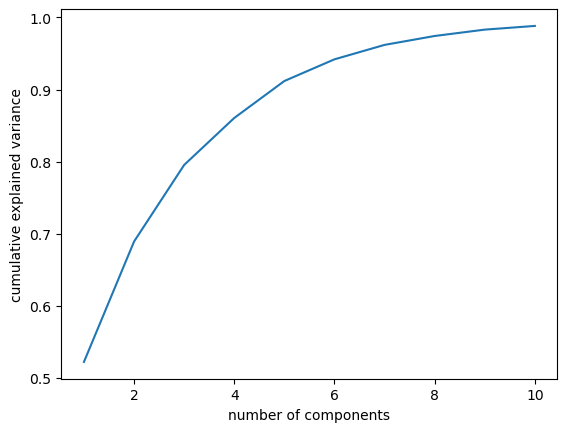

In [105]:
plt.plot(pc,cum_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative variance explained with 10 PCA components')

#### Q3E:  Draw a horizontal line on the above plot to highlight the threshold of 90%

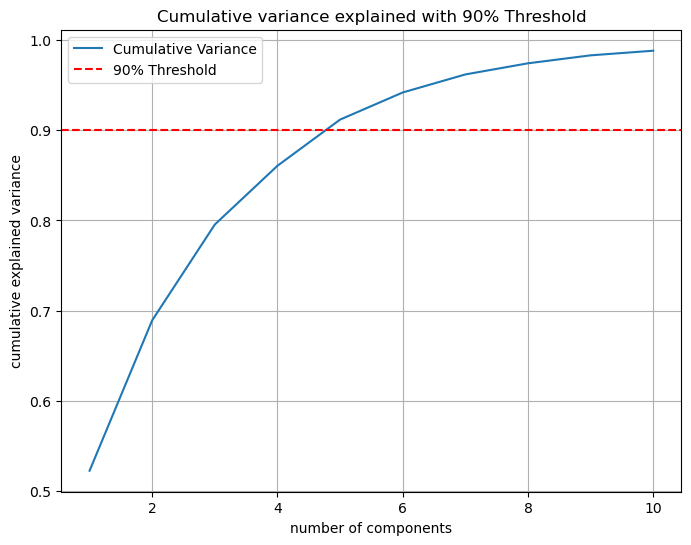

In [107]:
plt.figure(figsize=(8, 6))
plt.plot(pc, cum_var, label='Cumulative Variance')

# Draw a horizontal line for 90% threshold
threshold = 0.9
plt.axhline(y=threshold, color='r', linestyle='--', label='90% Threshold')

# Add labels and legend
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained with 90% Threshold')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

- From the above plot, we need minimum 5 components with 90% or above variance explained. So lets chose 5 PCA components for furthur analysis

#### Q3F: Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

In [109]:
pc_req = 5
pca = PCA(n_components=pc_req)
principalComponents = pca.fit_transform(X_z)

In [110]:
pc_list_ = []
for i in range(1,pc_req+1):
    pc_name = 'pc'+str(i)
    pc_list_.append(pc_name)

In [111]:
pc_list_

['pc1', 'pc2', 'pc3', 'pc4', 'pc5']

In [112]:
X_pc = pd.DataFrame(principalComponents, columns = pc_list_)
X_pc.head()

,pc1,pc2,pc3,pc4,pc5
0,0.334419,-0.207205,0.989621,0.181172,0.081696
1,-1.591617,-0.417757,-0.373668,0.225428,0.694063
2,3.763429,0.197359,0.089320,1.215192,0.703584
3,-1.742872,-2.829161,0.113006,0.358618,-0.351296
4,0.535605,4.805832,11.612519,0.111775,3.254691


In [113]:
cum_var = pca.explained_variance_ratio_.cumsum()
print(cum_var)

[0.52230267 0.68922923 0.79546632 0.86062017 0.91185641]


#### Q3G:  Train SVM model on components selected from above step.

In [159]:
#splitting the PC data in test and train sets
from sklearn.model_selection import train_test_split
X_train_pc, X_test_pc, y_train, y_test = train_test_split(X_pc,y, test_size = 0.2, random_state = 10)

# Building a Support Vector Machine on train data
svc_model = SVC() # default kernel is rbf, {'C':[0.1, 0.9, 1,10,100], 'kernel':['rbf',radial', 'linear'], 'gamma':[1,0.1, 0.001]}
svc_model.fit(X_train_pc, y_train)

prediction = svc_model.predict(X_train_pc)
# check the accuracy on the training set
base_tr_acc = svc_model.score(X_train_pc, y_train)
base_f1_tr = f1_score(y_train,prediction, average='micro')

print(svc_model.score(X_train_pc, y_train))
print(svc_model.score(X_test_pc, y_test))

0.8012048192771084
0.7904191616766467


#### Q3H:  Print Classification metrics for train data of above model and share insights.

In [145]:
print(classification_report(prediction,y_train))

              precision    recall  f1-score   support

         bus       0.67      0.85      0.75       135
         car       0.91      0.82      0.87       376
         van       0.70      0.71      0.70       153

    accuracy                           0.80       664
   macro avg       0.76      0.79      0.77       664
weighted avg       0.81      0.80      0.80       664



### Q4. Performance Improvement:
#### Q4A: Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [137]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid to search through
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly']}

# Create the SVC classifier
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pc, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [140]:
# Make predictions with the best parameters
y_pred = grid_search.predict(X_train_pc)

#### Q4B: Share best Parameters observed from above step.
- Best parameters which are found from GridSearchCV with SVC classifier is  **'C': 10, 'gamma': 0.1, 'kernel': 'rbf'**.

#### Q4C: Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [160]:
from sklearn.metrics import f1_score
# Print classification report and accuracy score
print("Classification Report:\n", classification_report(y_train, y_pred))
print("Accuracy Score:", accuracy_score(y_train, y_pred))
gs_tr_acc = accuracy_score(y_train, y_pred)
gs_f1_tr = f1_score(y_train,y_pred, average='micro')

Classification Report:
               precision    recall  f1-score   support

         bus       0.88      0.88      0.88       171
         car       0.92      0.95      0.94       338
         van       0.89      0.83      0.86       155

    accuracy                           0.91       664
   macro avg       0.90      0.89      0.89       664
weighted avg       0.90      0.91      0.90       664

Accuracy Score: 0.9051204819277109


In [161]:
d = {'Model': ['Base RBF', 'RBF w/ GridSearch and Hyperparameters'], 
     'Train_Accuracy':[base_tr_acc, gs_tr_acc], 
     'F1 Score': [base_f1_tr, gs_f1_tr]}

In [164]:
df_metrics = pd.DataFrame(d)
df_metrics

,Model,Train_Accuracy,F1 Score
0,Base RBF,0.801205,0.801205
1,RBF w/ GridSearch and Hyperparameters,0.905120,0.905120


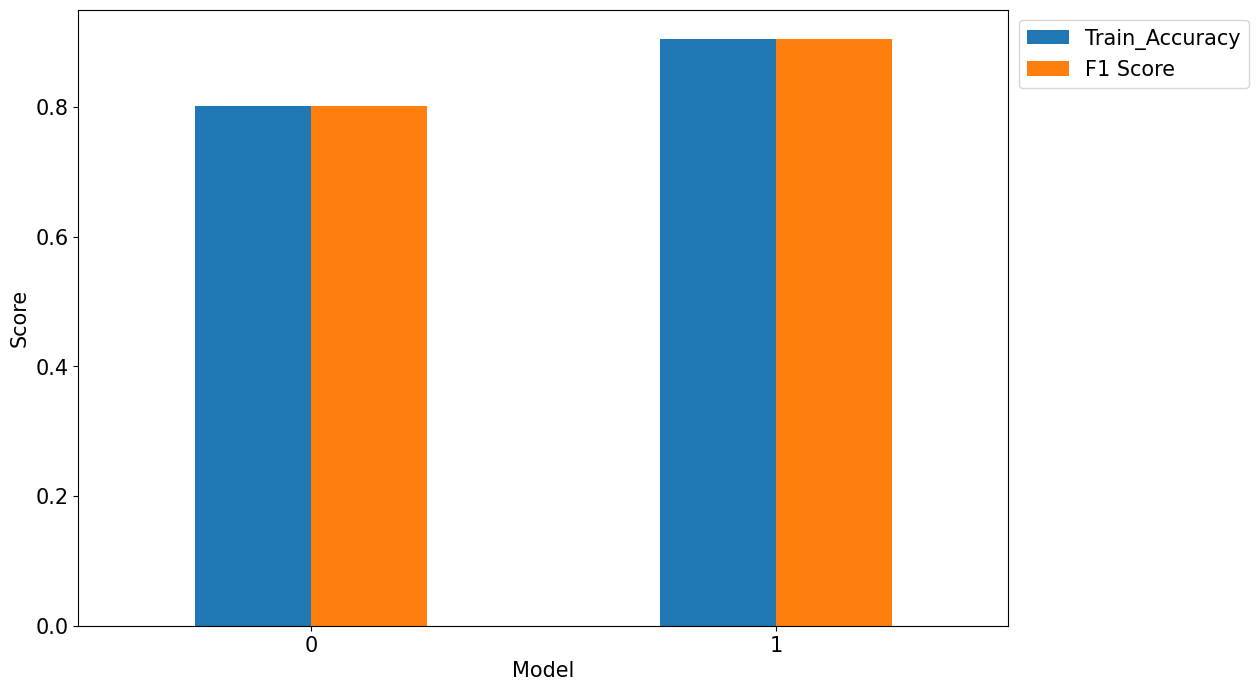

In [165]:
g = df_metrics.plot(kind='bar', rot = 0, figsize = (12,8), fontsize = 15) #, colormap='Paired')
g.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
g.set_ylabel("Score", fontsize=15)
g.set_xlabel("Model", fontsize=15)
plt.show()

#### Insights:
   - On original data without PCA, SVC classifier(default parameters) model accuracy is at 97% which is really good but
     this data seems to be over fitting.
   - With SVC classifier(using default parameters) on PCA treated data, training and F1 scores are 80% and 80%.
   - By doing Gridsearch and with Hyperparameters, model was tried with total 240 fits and found that Training 
     and F1 Scores as 90%. Model performance has been improved by 10%
   - Original dataset has 18 features and using PCA we have reduced the feature dimensions significantly with 90% variance           explained with just 5 PCA components and the data doesnt seem to be over fitting.
   - Recommended model is to use SVC classifier using GridSearch on PCA data for otimal performance.

### Q5:  Data Understanding & Cleaning:
#### Q5A:  Explain pre-requisite/assumptions of PCA.

Here are some prerequisites and assumptions associated with PCA:

**Linear Relationships:** 
PCA assumes that the relationships among variables in the data are linear. It works well when variables have linear correlations or can be well approximated by linear relationships.

**Large Variance Directions:** 
PCA assumes that the directions in the feature space with the highest variance are the most important. It seeks to find orthogonal axes (principal components) along which the variance is maximized.

**Zero Mean:**
PCA assumes that the data is centered around zero mean. Before applying PCA, it's important to subtract the mean from each feature so that the data is centered.

**Homoscedasticity:**
PCA works best with data that has a constant variance across all features. If the variance is not constant, scaling the data (standardization or normalization) can help to make it homoscedastic.

**Orthogonality of Components:**
PCA assumes that the principal components (new feature axes) are orthogonal to each other. This orthogonality property simplifies the interpretation and enhances computational efficiency.

**Large Data Variability:**
PCA works best when the data exhibits significant variability. If the data has very low variability, PCA may not be effective in capturing meaningful patterns.

**Independence:**
Although PCA does not require the variables to be statistically independent, it works better when the variables are less correlated. However, PCA can still be applied to correlated data to reduce dimensionality.

**Numeric Data:**
PCA is typically applied to numeric data. Categorical variables may need to be converted to numeric format or preprocessed separately before applying PCA.

**Sample Size:**
While PCA can be applied to datasets of various sizes, it becomes more reliable with larger sample sizes. Small datasets may not capture the full variability of the data.

**Euclidean Space:**
PCA operates in the Euclidean space. Therefore, the data should be amenable to the concept of distance in Euclidean space.

#### Q5B:  Explain advantages and limitations of PCA.

Principal Component Analysis (PCA) offers several advantages and has certain limitations when applied in machine learning tasks. Here's a breakdown of both:

##### Advantages of PCA:
**Dimensionality Reduction**: PCA reduces the dimensionality of the data by transforming it into a lower-dimensional space while preserving most of the variance. This helps in simplifying the computational complexity of algorithms and mitigating the curse of dimensionality.

**Feature Extraction:** PCA extracts a set of linearly uncorrelated features called principal components, which are linear combinations of the original features. These components often capture the most significant patterns and structures in the data, making them useful for analysis and modeling.

**Noise Reduction:** PCA can help in filtering out noise and retaining the most important signal present in the data. By focusing on the directions of maximum variance, PCA effectively emphasizes the informative features while minimizing the influence of noisy or irrelevant features.

**Visualization:** PCA facilitates data visualization by projecting high-dimensional data onto a lower-dimensional subspace. This allows for easy interpretation and exploration of the data's structure, especially in two or three dimensions.

**Computationally Efficient:** PCA involves eigenvalue decomposition or singular value decomposition of the covariance matrix, which can be efficiently computed using numerical libraries. Therefore, PCA is computationally efficient and scalable to large datasets.

##### Limitations of PCA:
**Linearity Assumption:** PCA assumes that the relationships among variables are linear. It may not perform optimally if the underlying data relationships are highly nonlinear. 

**Loss of Interpretability:** While PCA reduces the dimensionality of the data, it may lead to a loss of interpretability as the principal components are combinations of the original features. Interpreting the principal components in terms of the original features can be challenging, especially in high-dimensional spaces.

**Orthogonal Transformation:** PCA performs an orthogonal transformation to find the principal components, which may not always capture the most meaningful directions in the data. 

**Sensitive to Scaling:** PCA is sensitive to the scaling of features. Features with larger scales may dominate the variance and influence the principal components disproportionately. It's essential to standardize or normalize the data before applying PCA to ensure that all features contribute equally.

**Data Interpretation:** While PCA is effective for reducing dimensionality and finding patterns in the data, it does not inherently provide insights into causality or relationships between variables. Interpretation of the principal components requires domain knowledge and careful consideration of the context.